In [186]:
import pandas as pd
import numpy as np
import random
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [187]:
data = pd.read_csv("2020-4-27.csv")

In [188]:
data.head()

,Title,Address,City,Price,Bedroom,Bathroom,Floors,Parking,Face,Year,Views,Area,Road,Road Width,Road Type,Build Area,Posted,Amenities
0,Flat System House On Sale At Budhanikantha : H...,"Budhanikantha, Budhanilkantha, Kathmandu",Kathmandu,90000000,6,3,2.0,10,West,2073.0,17,1-0-0-0 Aana,20 Feet / Blacktopped,20 Feet,Blacktopped,18-0-0-0 Aana,11 hours ago,"['Parking', 'Lawn', 'Garage', 'Frontyard', 'Fe..."
1,21 Aana Beautiful House : House For Sale In Bu...,"Pasikot, Budhanilkantha, Kathmandu",Kathmandu,80000000,5,3,2.0,9,East,2073.0,26,0-21-0-0 Aana,20 Feet / Blacktopped,20 Feet,Blacktopped,0-14-0-0 Aana,12 hours ago,"['Parking', 'Garage', 'Fencing', 'Frontyard', ..."
2,Beautiful To Floor House : House For Sale In D...,"Dhapasi, Dhapasi, Kathmandu",Kathmandu,70000000,5,3,2.0,12,East,2071.0,154,1-1-0-0 Aana,20 Feet / Blacktopped,20 Feet,Blacktopped,10-1-0-0 Aana,2 days ago,"['Parking', 'Lawn', 'Garage', 'Frontyard', 'Fe..."
3,Modern Architecture Bungalow House : House For...,"baluwatar, Baluwatar, Kathmandu",Kathmandu,130000000,6,4,3.0,9,West,2017.0,17,0-10-1-0 Aana,20 Feet / Blacktopped,20 Feet,Blacktopped,0-7-1-0 Aana,1 day ago,"['Parking', 'Lawn', 'Garage', 'Frontyard', 'Fe..."
4,Modern Bungalow House : House For Sale In Golf...,"Golfutar, Golfutar, Kathmandu",Kathmandu,100000000,6,3,2.0,10,East,2070.0,59,0-19-2-0 Aana,20 Feet / Blacktopped,20 Feet,Blacktopped,0-14-2-0 Aana,2 days ago,"['Parking', 'Lawn', 'Garage', 'Balcony', 'Back..."


In [189]:
data.tail()

,Title,Address,City,Price,Bedroom,Bathroom,Floors,Parking,Face,Year,Views,Area,Road,Road Width,Road Type,Build Area,Posted,Amenities
2206,"House For Rent In Chapali, Kathmandu","Bhangal, Chapali, Kathmandu",Kathmandu,500000,5,5,3.0,5,North East,NaN,3.1K,1 Ropani,16 Feet,16 Feet,NaN,N/A Sq. Feet,1 year ago,"['Balcony', 'Frontyard', 'Garden', 'Drainage',..."
2207,"House For Sale In Sitapaila, Kathmandu","Nagarjun, Sitapaila, Kathmandu",Kathmandu,12000000,4,2,2.0,1,North East,NaN,1.4K,2.5 Aana,13 Feet,13 Feet,NaN,N/A Sq. Feet,1 year ago,"['Balcony', 'Frontyard', 'Drainage', 'Water Su..."
2208,"House For Sale In Budhanilkantha, Kathmandu","Deuja Chowk, Budhanilkantha, Kathmandu",Kathmandu,27000000,5,3,2.0,1,East,2071.0,1.5K,8 Aana,12 Feet,12 Feet,NaN,N/A Sq. Feet,1 year ago,"['Balcony', 'Frontyard', 'Drainage', 'Water Su..."
2209,"House For Rent In Baneshwor, Kathmandu","Bhimsengola, Baneshwor, Kathmandu",Kathmandu,300000,9,3,2.0,4,North,NaN,2.5K,51 Aana,13 Feet,13 Feet,NaN,N/A Sq. Feet,1 year ago,"['Drainage', 'Water Supply', 'Garden', 'Fronty..."
2210,"House For Sale In Baluwatar, Kathmandu","Gocha marg, Baluwatar, Kathmandu",Kathmandu,72500000,5,2,3.0,5,East,NaN,19.6K,13 Aana,12 Feet,12 Feet,NaN,13 Aana,1 year ago,"['Garage', 'Balcony', 'Frontyard', 'Drainage',..."


In [190]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2211 entries, 0 to 2210
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       2211 non-null   object 
 1   Address     2211 non-null   object 
 2   City        2211 non-null   object 
 3   Price       2211 non-null   int64  
 4   Bedroom     2211 non-null   int64  
 5   Bathroom    2211 non-null   int64  
 6   Floors      1039 non-null   float64
 7   Parking     2211 non-null   int64  
 8   Face        2211 non-null   object 
 9   Year        582 non-null    float64
 10  Views       2211 non-null   object 
 11  Area        2211 non-null   object 
 12  Road        2211 non-null   object 
 13  Road Width  2211 non-null   object 
 14  Road Type   1426 non-null   object 
 15  Build Area  2211 non-null   object 
 16  Posted      2211 non-null   object 
 17  Amenities   2211 non-null   object 
dtypes: float64(2), int64(4), object(12)
memory usage: 311.1+ KB


In [191]:
data=data.drop(["Title","Views","Posted","Road","Parking","Build Area"],axis=1)

In [192]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2211 entries, 0 to 2210
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Address     2211 non-null   object 
 1   City        2211 non-null   object 
 2   Price       2211 non-null   int64  
 3   Bedroom     2211 non-null   int64  
 4   Bathroom    2211 non-null   int64  
 5   Floors      1039 non-null   float64
 6   Face        2211 non-null   object 
 7   Year        582 non-null    float64
 8   Area        2211 non-null   object 
 9   Road Width  2211 non-null   object 
 10  Road Type   1426 non-null   object 
 11  Amenities   2211 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 207.4+ KB


In [193]:
data.City.value_counts()

City
Kathmandu      1483
Lalitpur        432
Bhaktapur        85
Pokhara          64
Chitwan          33
Nawalparasi      12
Makwanpur        12
Dharan           11
Jhapa            10
Sunsari           7
Kirtipur          7
Kavre             7
Butwal            6
Biratnagar        6
Bara              4
Dhading           4
Morang            4
Parsa             4
Itahari           3
Kaski             3
Rupandehi         3
Mahottari         1
Bardiya           1
Birtamod          1
Dang              1
Surkhet           1
Bhairahawa        1
Kapilvastu        1
Tanahu            1
Illam             1
Nawalpur          1
Kailali           1
Name: count, dtype: int64

In [194]:
city_counts = data.City.value_counts()
values_to_drop= city_counts[city_counts < 10].index.tolist()
print(values_to_drop)

['Sunsari', 'Kirtipur', 'Kavre', 'Butwal', 'Biratnagar', 'Bara', 'Dhading', 'Morang', 'Parsa', 'Itahari', 'Kaski', 'Rupandehi', 'Mahottari', 'Bardiya', 'Birtamod', 'Dang', 'Surkhet', 'Bhairahawa', 'Kapilvastu', 'Tanahu', 'Illam', 'Nawalpur', 'Kailali']


In [195]:
data= data.loc[~data['City'].isin(values_to_drop)]

In [196]:
data.City.value_counts()

City
Kathmandu      1483
Lalitpur        432
Bhaktapur        85
Pokhara          64
Chitwan          33
Makwanpur        12
Nawalparasi      12
Dharan           11
Jhapa            10
Name: count, dtype: int64

In [197]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2142 entries, 0 to 2210
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Address     2142 non-null   object 
 1   City        2142 non-null   object 
 2   Price       2142 non-null   int64  
 3   Bedroom     2142 non-null   int64  
 4   Bathroom    2142 non-null   int64  
 5   Floors      1013 non-null   float64
 6   Face        2142 non-null   object 
 7   Year        575 non-null    float64
 8   Area        2142 non-null   object 
 9   Road Width  2142 non-null   object 
 10  Road Type   1375 non-null   object 
 11  Amenities   2142 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 217.5+ KB


In [198]:
data['Address'] = data['Address'].str.lower().str.strip()

# Extract middle part (Neighborhood)
def extract_neighborhood(addr):
    if pd.isna(addr):
        return 'unknown'
    parts = addr.split(',')
    if len(parts) >= 2:
        return parts[1].strip()
    else:
        return 'unknown'

data['Neighborhood'] = data['Address'].apply(extract_neighborhood)

In [199]:
(data['Neighborhood'].str.strip() == '').sum()

1

In [200]:
mode_value = data['Neighborhood'].mode()[0]
data.loc[data['Neighborhood'].str.strip() == '', 'Neighborhood'] = mode_value

In [201]:
(data['Neighborhood'].str.strip() == '').sum()

0

In [202]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2142 entries, 0 to 2210
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Address       2142 non-null   object 
 1   City          2142 non-null   object 
 2   Price         2142 non-null   int64  
 3   Bedroom       2142 non-null   int64  
 4   Bathroom      2142 non-null   int64  
 5   Floors        1013 non-null   float64
 6   Face          2142 non-null   object 
 7   Year          575 non-null    float64
 8   Area          2142 non-null   object 
 9   Road Width    2142 non-null   object 
 10  Road Type     1375 non-null   object 
 11  Amenities     2142 non-null   object 
 12  Neighborhood  2142 non-null   object 
dtypes: float64(2), int64(3), object(8)
memory usage: 234.3+ KB


In [203]:
data.Neighborhood.value_counts()

Neighborhood
budhanilkantha                    198
imadol                             79
bhaisepati                         52
baluwatar                          42
hattigauda                         40
                                 ... 
near sunrise bank                   1
ward no 6                           1
1 kitta inside from main road.      1
chabahil main road.                 1
dada pauwa                          1
Name: count, Length: 406, dtype: int64

In [204]:
# Function to convert each entry to Aana
def convert_to_aana(area):
    area = area.strip()

    # Check for "Ropani" and convert
    if "Ropani" in area:
        ropani = float(re.findall(r'\d+', area)[0])
        return ropani * 16

    # Check for "Sq. Feet" and convert to aana
    if "Sq. Feet" in area:
        # Extract the numeric part using regex
        matches = re.findall(r'\d+', area)
        if matches:  # Ensure there is at least one match
            sq_feet = float(matches[0])
            return sq_feet / 342.25  # Convert to aana

    # Check for a-b-c-d Aana format
    if re.match(r'\d+-\d+-\d+-\d+ Aana', area):
        parts = list(map(int, area.split(' ')[0].split('-')))
        a, b, c, d = parts
        return a * 16 + b + c / 4 + d / 16

    # Check for x-y-z Aana format
    if re.match(r'\d+-\d+-\d+ Aana', area):
        parts = list(map(int, area.split(' ')[0].split('-')))
        x, y, z = parts
        return x + y / 4 + z / 16

    # Check for x-y Aana format
    if re.match(r'\d+-\d+ Aana', area):
        parts = list(map(int, area.split(' ')[0].split('-')))
        x, y = parts
        return x + y / 4

    # Check for "X Aana" format (including decimals)
    if re.match(r'^\d+\.?\d* Aana$', area):
        return float(re.findall(r'\d+\.?\d*', area)[0])

    # If none of the formats match, return "Remove"
    return "Remove"

In [205]:
data['Area'] = data['Area'].apply(convert_to_aana)

In [206]:
data.head()

,Address,City,Price,Bedroom,Bathroom,Floors,Face,Year,Area,Road Width,Road Type,Amenities,Neighborhood
0,"budhanikantha, budhanilkantha, kathmandu",Kathmandu,90000000,6,3,2.0,West,2073.0,16.0,20 Feet,Blacktopped,"['Parking', 'Lawn', 'Garage', 'Frontyard', 'Fe...",budhanilkantha
1,"pasikot, budhanilkantha, kathmandu",Kathmandu,80000000,5,3,2.0,East,2073.0,21.0,20 Feet,Blacktopped,"['Parking', 'Garage', 'Fencing', 'Frontyard', ...",budhanilkantha
2,"dhapasi, dhapasi, kathmandu",Kathmandu,70000000,5,3,2.0,East,2071.0,17.0,20 Feet,Blacktopped,"['Parking', 'Lawn', 'Garage', 'Frontyard', 'Fe...",dhapasi
3,"baluwatar, baluwatar, kathmandu",Kathmandu,130000000,6,4,3.0,West,2017.0,10.25,20 Feet,Blacktopped,"['Parking', 'Lawn', 'Garage', 'Frontyard', 'Fe...",baluwatar
4,"golfutar, golfutar, kathmandu",Kathmandu,100000000,6,3,2.0,East,2070.0,19.5,20 Feet,Blacktopped,"['Parking', 'Lawn', 'Garage', 'Balcony', 'Back...",golfutar


In [207]:
data['Amenities_Count'] = data['Amenities'].apply(lambda x: len(eval(x)) if pd.notnull(x) and x != '[]' else 0)

In [208]:
import datetime as dt
current_year_bs= dt.datetime.now().year + 57
data['Property_Age'] = current_year_bs - data['Year']

In [209]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2142 entries, 0 to 2210
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Address          2142 non-null   object 
 1   City             2142 non-null   object 
 2   Price            2142 non-null   int64  
 3   Bedroom          2142 non-null   int64  
 4   Bathroom         2142 non-null   int64  
 5   Floors           1013 non-null   float64
 6   Face             2142 non-null   object 
 7   Year             575 non-null    float64
 8   Area             2142 non-null   object 
 9   Road Width       2142 non-null   object 
 10  Road Type        1375 non-null   object 
 11  Amenities        2142 non-null   object 
 12  Neighborhood     2142 non-null   object 
 13  Amenities_Count  2142 non-null   int64  
 14  Property_Age     575 non-null    float64
dtypes: float64(3), int64(4), object(8)
memory usage: 267.8+ KB


In [210]:
data=data.drop(["Address", "Year", "Amenities"],axis=1)

In [211]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2142 entries, 0 to 2210
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   City             2142 non-null   object 
 1   Price            2142 non-null   int64  
 2   Bedroom          2142 non-null   int64  
 3   Bathroom         2142 non-null   int64  
 4   Floors           1013 non-null   float64
 5   Face             2142 non-null   object 
 6   Area             2142 non-null   object 
 7   Road Width       2142 non-null   object 
 8   Road Type        1375 non-null   object 
 9   Neighborhood     2142 non-null   object 
 10  Amenities_Count  2142 non-null   int64  
 11  Property_Age     575 non-null    float64
dtypes: float64(2), int64(4), object(6)
memory usage: 217.5+ KB


In [212]:
data.head()

,City,Price,Bedroom,Bathroom,Floors,Face,Area,Road Width,Road Type,Neighborhood,Amenities_Count,Property_Age
0,Kathmandu,90000000,6,3,2.0,West,16.0,20 Feet,Blacktopped,budhanilkantha,16,9.0
1,Kathmandu,80000000,5,3,2.0,East,21.0,20 Feet,Blacktopped,budhanilkantha,15,9.0
2,Kathmandu,70000000,5,3,2.0,East,17.0,20 Feet,Blacktopped,dhapasi,16,11.0
3,Kathmandu,130000000,6,4,3.0,West,10.25,20 Feet,Blacktopped,baluwatar,16,65.0
4,Kathmandu,100000000,6,3,2.0,East,19.5,20 Feet,Blacktopped,golfutar,16,12.0


In [213]:
data.isna().count()

City               2142
Price              2142
Bedroom            2142
Bathroom           2142
Floors             2142
Face               2142
Area               2142
Road Width         2142
Road Type          2142
Neighborhood       2142
Amenities_Count    2142
Property_Age       2142
dtype: int64

In [214]:
data.Area.value_counts().get('Remove',0)

159

In [215]:
data = data[data.Area != 'Remove']

In [216]:
data.isna().sum()

City                  0
Price                 0
Bedroom               0
Bathroom              0
Floors             1031
Face                  0
Area                  0
Road Width            0
Road Type           728
Neighborhood          0
Amenities_Count       0
Property_Age       1448
dtype: int64

In [217]:
def convert_to_feet(value):
    if 'Meter' in value:
        meters = int(float(value.replace(' Meter', '')))
        return meters * 3.28084
    elif 'Feet' in value:
        return int(float(value.replace(' Feet', '')))
    else:
        return "Remove"

In [218]:
data['Road Width'] = data['Road Width'].apply(convert_to_feet)

In [219]:
data['Road Width'].value_counts().get('Remove',0)

0

In [220]:
data["Road Type"].unique()

array([' Blacktopped', ' Gravelled', ' Concrete', ' Paved', nan,
       ' Soil Stabilized', ' Alley'], dtype=object)

In [221]:
data['Road Type'].value_counts()

Road Type
Blacktopped        669
Gravelled          352
Soil Stabilized    139
Paved               69
Concrete            24
Alley                2
Name: count, dtype: int64

In [222]:
data.loc[data['Road Type'].isin([' Blacktopped', ' Concrete']), 'Road Type'] = 'Paved'
data['Road Type'] = data['Road Type'].fillna(' Soil Stabilized')

In [223]:
data['Road Type'] = data['Road Type'].str.strip()

In [224]:
data['Road Type'].value_counts()

Road Type
Soil Stabilized    867
Paved              762
Gravelled          352
Alley                2
Name: count, dtype: int64

In [225]:
data = data.loc[~data['Road Type'].isin(['Alley'])]


In [226]:
data['Road Type'].value_counts()

Road Type
Soil Stabilized    867
Paved              762
Gravelled          352
Name: count, dtype: int64

In [227]:
data['Floors'].median()

3.0

In [228]:
data['Floors'] = data['Floors'].fillna(data['Floors'].median())

In [229]:
data['Property_Age'].dtype

dtype('float64')

<Axes: >

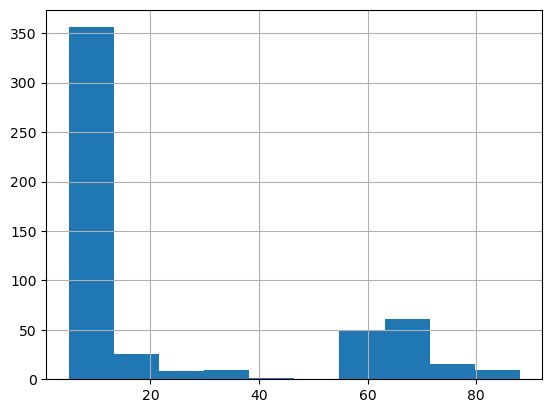

In [230]:
data['Property_Age'].describe()
data['Property_Age'].hist()

In [231]:
print("Median Property Age:", data['Property_Age'].median())


Median Property Age: 8.0


In [232]:
data['Property_Age'] = data['Property_Age'].fillna(data['Property_Age'].median())

In [233]:
data.isna().sum()

City               0
Price              0
Bedroom            0
Bathroom           0
Floors             0
Face               0
Area               0
Road Width         0
Road Type          0
Neighborhood       0
Amenities_Count    0
Property_Age       0
dtype: int64

In [234]:
lower = data['Price'].quantile(0.01)
upper = data['Price'].quantile(0.99)

data['Price'] = np.clip(data['Price'], lower, upper)


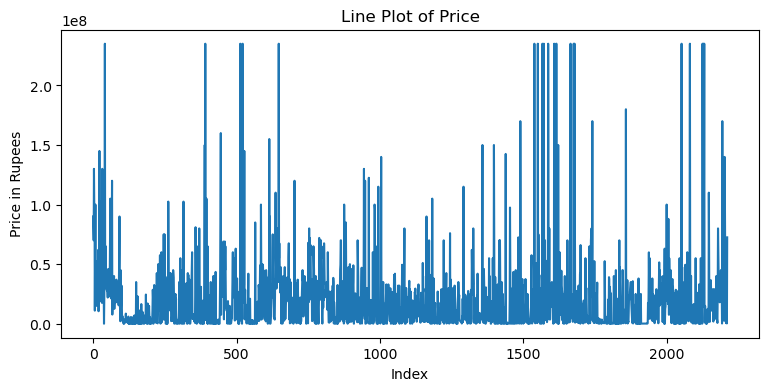

In [235]:
plt.figure(figsize=(9, 4))
data['Price'].plot(kind='line')

# Add labels and title
plt.title('Line Plot of Price')
plt.xlabel('Index')
plt.ylabel('Price in Rupees')

# Show the plot
plt.show()

In [236]:
data.head()

,City,Price,Bedroom,Bathroom,Floors,Face,Area,Road Width,Road Type,Neighborhood,Amenities_Count,Property_Age
0,Kathmandu,90000000,6,3,2.0,West,16.0,20.0,Paved,budhanilkantha,16,9.0
1,Kathmandu,80000000,5,3,2.0,East,21.0,20.0,Paved,budhanilkantha,15,9.0
2,Kathmandu,70000000,5,3,2.0,East,17.0,20.0,Paved,dhapasi,16,11.0
3,Kathmandu,130000000,6,4,3.0,West,10.25,20.0,Paved,baluwatar,16,65.0
4,Kathmandu,100000000,6,3,2.0,East,19.5,20.0,Paved,golfutar,16,12.0


In [237]:
data.reset_index(drop=True, inplace=True)

In [238]:
data.head()

,City,Price,Bedroom,Bathroom,Floors,Face,Area,Road Width,Road Type,Neighborhood,Amenities_Count,Property_Age
0,Kathmandu,90000000,6,3,2.0,West,16.0,20.0,Paved,budhanilkantha,16,9.0
1,Kathmandu,80000000,5,3,2.0,East,21.0,20.0,Paved,budhanilkantha,15,9.0
2,Kathmandu,70000000,5,3,2.0,East,17.0,20.0,Paved,dhapasi,16,11.0
3,Kathmandu,130000000,6,4,3.0,West,10.25,20.0,Paved,baluwatar,16,65.0
4,Kathmandu,100000000,6,3,2.0,East,19.5,20.0,Paved,golfutar,16,12.0


In [239]:
(data['Area'] == 0).sum()

37

In [240]:
data.eq(0).sum()


City                 0
Price                0
Bedroom            954
Bathroom           987
Floors              25
Face                 0
Area                37
Road Width         172
Road Type            0
Neighborhood         0
Amenities_Count    911
Property_Age         0
dtype: int64

In [241]:
cols_to_fix = ['Area', 'Floors']

for col in cols_to_fix:
    median_val = data.loc[data[col] != 0, col].median()
    data.loc[data[col] == 0, col] = median_val


In [242]:
# Apply floor & area logic
data = data[
    ~(
        
        ((data['Price'] > 50000000) & (data['Floors'] < 2) & (data['Area'] < 3)) |
        ((data['Price'] < 50000000) & (data['Area'] > 15)) 
        
    )
]

print(f"Rows after floor & area rules: {data.shape[0]}")


Rows after floor & area rules: 1771


In [243]:
data.head()

,City,Price,Bedroom,Bathroom,Floors,Face,Area,Road Width,Road Type,Neighborhood,Amenities_Count,Property_Age
0,Kathmandu,90000000,6,3,2.0,West,16.0,20.0,Paved,budhanilkantha,16,9.0
1,Kathmandu,80000000,5,3,2.0,East,21.0,20.0,Paved,budhanilkantha,15,9.0
2,Kathmandu,70000000,5,3,2.0,East,17.0,20.0,Paved,dhapasi,16,11.0
3,Kathmandu,130000000,6,4,3.0,West,10.25,20.0,Paved,baluwatar,16,65.0
4,Kathmandu,100000000,6,3,2.0,East,19.5,20.0,Paved,golfutar,16,12.0


In [244]:
data_perAana = pd.DataFrame({'Price_per_aana': data['Price'] / data['Area']})

In [245]:
data_perAana.head(5)

,Price_per_aana
0,5625000.0
1,3809523.809524
2,4117647.058824
3,12682926.829268
4,5128205.128205


In [246]:
data_perAana.replace([float('inf'), -float('inf')], np.nan, inplace=True)
data_perAana.dropna(inplace=True)

C:\Users\abhin\AppData\Local\Temp\ipykernel_20236\1563358352.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_perAana.replace([float('inf'), -float('inf')], np.nan, inplace=True)


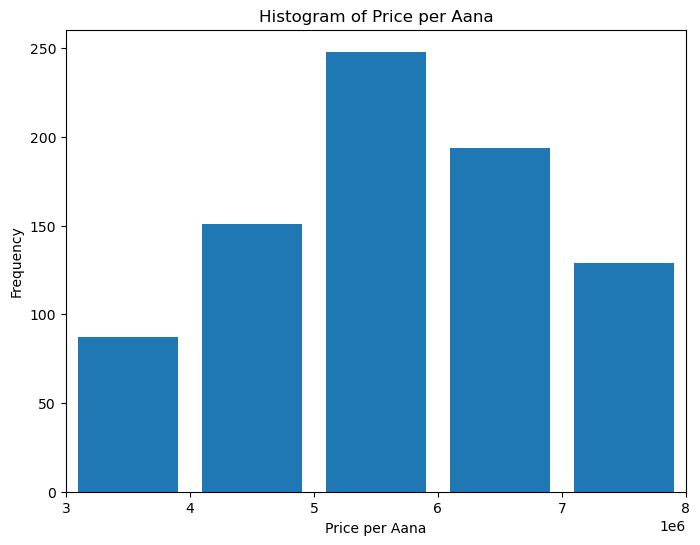

In [247]:
plt.figure(figsize=(8, 6))
bins = [3000000, 4000000, 5000000, 6000000, 7000000, 8000000]
plt.hist(data_perAana['Price_per_aana'], bins = bins,rwidth=0.8)
plt.xlim(3000000, 8000000)
plt.title('Histogram of Price per Aana')
plt.xlabel('Price per Aana')
plt.ylabel('Frequency')
plt.show()

In [248]:
print(data['Area'].dtype)
print(data['Area'].describe())
print(data['Area'].value_counts())


object
count     1771.0
unique     241.0
top          4.0
freq       230.0
Name: Area, dtype: float64
Area
4.000000     230
5.000000     144
3.000000     121
6.000000      84
8.000000      73
            ... 
13.500000      1
1.250000       1
5.224251       1
6.200000       1
3.903579       1
Name: count, Length: 241, dtype: int64


In [249]:
data['Area'] = pd.to_numeric(data['Area'], errors='coerce')

In [250]:
print(data['Area'].dtype)
print(data['Area'].describe())
print(data['Area'].value_counts())


float64
count    1771.000000
mean        6.166116
std         6.736967
min         0.008766
25%         3.500000
50%         4.500000
75%         7.000000
max       156.750000
Name: Area, dtype: float64
Area
4.000000     230
5.000000     144
3.000000     121
6.000000      84
8.000000      73
            ... 
13.500000      1
1.250000       1
5.224251       1
6.200000       1
3.903579       1
Name: count, Length: 241, dtype: int64


In [251]:
data = data[(data['Area'] >= 2.0) & (data['Area'] <= 100.0)]

In [252]:
print(data['Area'].dtype)
print(data['Area'].describe())
print(data['Area'].value_counts())


float64
count    1669.000000
mean        6.395926
std         5.726851
min         2.000000
25%         3.600000
50%         5.000000
75%         7.158510
max        96.000000
Name: Area, dtype: float64
Area
4.000000     230
5.000000     144
3.000000     121
6.000000      84
8.000000      73
            ... 
26.000000      1
13.500000      1
5.224251       1
6.200000       1
3.903579       1
Name: count, Length: 202, dtype: int64


Text(0, 0.5, 'Average Price')

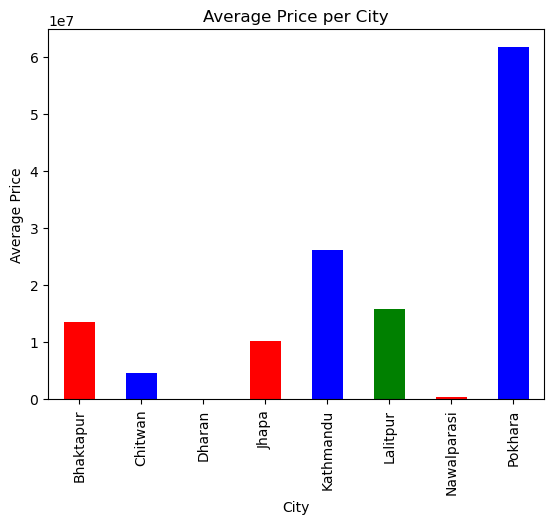

In [253]:
avg_price_per_city = data.groupby('City')['Price'].mean()
avg_price_per_city.plot(kind='bar', color=['red', 'blue', 'green'])
plt.title('Average Price per City')
plt.xlabel('City')
plt.ylabel('Average Price')

In [255]:
data.drop('Face',axis=1,inplace=True)

In [256]:
data.columns = data.columns.str.replace(' ', '_')

Text(0, 0.5, 'Average Price')

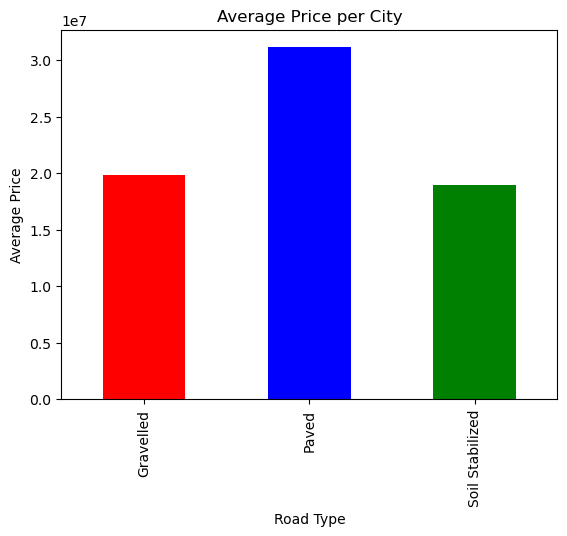

In [257]:
avg_price_per_city = data.groupby('Road_Type')['Price'].mean()
avg_price_per_city.plot(kind='bar', color=['red', 'blue', 'green'])
plt.title('Average Price per City')
plt.xlabel('Road Type')
plt.ylabel('Average Price')

In [258]:
print(data.dtypes)

City                object
Price                int64
Bedroom              int64
Bathroom             int64
Floors             float64
Area               float64
Road_Width         float64
Road_Type           object
Neighborhood        object
Amenities_Count      int64
Property_Age       float64
dtype: object


In [259]:
data.to_csv('cleaned_data.csv', index=False)

PermissionError: [Errno 13] Permission denied: 'cleaned_data.csv'